## Predicting the Foreign Exchange Price of XAU/USD using Machine Learning

## 1. Problem definition

The goal of this project is to predict the future price of GOLD/DOLLAR (XAU/USD) using Machine Learning. The model uses Linear Regression and predicts the 'Close' column. The model's performance is improved through techniques such as feature engineering, normalization evaluation using various metrics and hyperparameter tuning.

## 2. Data

The historical data was downloaded from eatradingacademy.com https://eatradingacademy.com/software/forex-historical-data/

## 3. Evaluation

The model's performance is evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2).

## 3. Features

Some information about the data:

* 1-day period data from the last ten years, 2013-01-01 to 2023-05-10
* Provided features: Time, Open, High, Low, Close, Volume

In [51]:
# Import all the tools we need

# Numpy and Pandas are used for data manipulation
import numpy as np
import pandas as pd

# Matplot lib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
plt.style.use ('seaborn-darkgrid')

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

# Model evaluations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Importing the data and preparing it for modelling

In [52]:
# Load the data into a pandas DataFrame
df = pd.read_csv('data/XAUUSD_D.csv', low_memory=False,
                parse_dates=['Time'], dayfirst=True)

### Data Exploration (Exploratory data analysis (EDA))

In [53]:
df.head()

,Time,Open,High,Low,Close,Volume
0,2013-01-01,1674.603,1674.603,1670.152,1670.819,59
1,2013-01-02,1670.796,1694.873,1670.352,1687.252,1378
2,2013-01-03,1687.252,1689.952,1660.752,1660.887,1379
3,2013-01-04,1661.052,1662.152,1625.759,1655.463,1319
4,2013-01-06,1655.943,1659.052,1655.553,1656.752,59


In [54]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    3218 non-null   datetime64[ns]
 1   Open    3218 non-null   float64       
 2   High    3218 non-null   float64       
 3   Low     3218 non-null   float64       
 4   Close   3218 non-null   float64       
 5   Volume  3218 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 151.0 KB


In [55]:
df.shape # (rows, columns)

(3218, 6)

In [56]:
df.describe()

,Open,High,Low,Close,Volume
count,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000
mean,1454.677340,1463.133727,1445.770065,1454.668851,1137.843070
std,267.088027,269.162985,264.782144,267.201643,474.371807
min,1052.800000,1058.799000,1046.231000,1052.799000,41.000000
25%,1245.076750,1252.510000,1239.585000,1244.909250,1260.000000
50%,1323.716000,1330.013500,1316.537000,1323.486000,1379.000000
75%,1731.901750,1743.344250,1722.165000,1732.449500,1380.000000
max,2069.188000,2079.778000,2034.385000,2069.178000,1388.000000


In [57]:
# To see the first 1000
df[:1000]

,Time,Open,High,Low,Close,Volume
0,2013-01-01,1674.603,1674.603,1670.152,1670.819,59
1,2013-01-02,1670.796,1694.873,1670.352,1687.252,1378
2,2013-01-03,1687.252,1689.952,1660.752,1660.887,1379
3,2013-01-04,1661.052,1662.152,1625.759,1655.463,1319
4,2013-01-06,1655.943,1659.052,1655.553,1656.752,59
...,...,...,...,...,...,...
995,2016-03-15,1236.130,1238.039,1225.659,1232.839,1380
996,2016-03-16,1232.830,1263.842,1226.718,1258.761,1380
997,2016-03-17,1258.779,1270.892,1254.389,1258.979,1380
998,2016-03-18,1258.980,1266.848,1247.798,1254.788,1260


In [58]:
# Check if there is any null values
df.isna().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

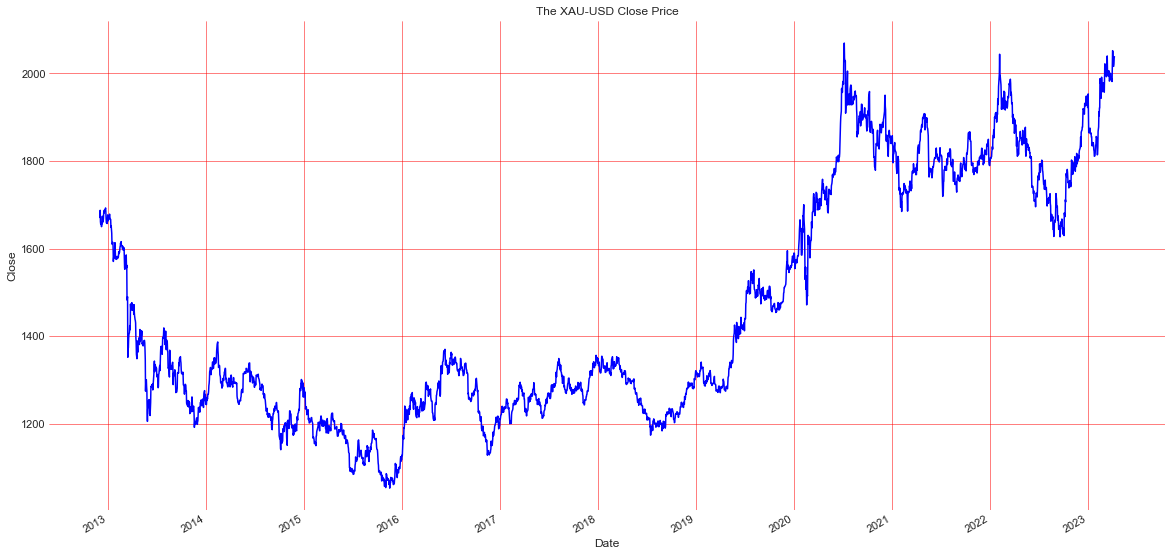

In [59]:
# Plot the dataframe

date = df['Time']
value = df['Close']

# Dealing with dates on the X axis
fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('white')

half_year_locator = mdates.MonthLocator(interval=12)
year_month_formatter = mdates.DateFormatter('%Y')


ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only
ax.xaxis.set_major_formatter(year_month_formatter) # Formatter for major axis only
ax.plot(date, value, color='blue');

# Add the grid
# Customize the major grid (outer grid)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid (inner grid)
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('The XAU-USD Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Rotates and right aligns the x labels
# Also moves the bottom of the axes up to make room for them
fig.autofmt_xdate()

In [60]:
# Separate features and target variable
X = df.drop(['Close', 'Time'], axis=1) 
y = df['Close']

In [61]:
# Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [62]:
X

,Open,High,Low,Volume
0,1674.603,1674.603,1670.152,59
1,1670.796,1694.873,1670.352,1378
2,1687.252,1689.952,1660.752,1379
3,1661.052,1662.152,1625.759,1319
4,1655.943,1659.052,1655.553,59
...,...,...,...,...
3213,2049.774,2052.925,1999.455,1260
3214,2016.608,2018.124,2014.134,120
3215,2015.964,2029.334,2015.064,1380
3216,2021.224,2037.494,2019.344,1380


In [63]:
X_normalized

array([[0.6117772 , 0.60315051, 0.63140057, 0.01336303],
       [0.60803158, 0.623004  , 0.63160297, 0.9925761 ],
       [0.62422225, 0.61818412, 0.62188788, 0.99331849],
       ...,
       [0.94763417, 0.95059252, 0.98044738, 0.99406088],
       [0.95280936, 0.95858485, 0.98477869, 0.99406088],
       [0.96758718, 0.96898663, 0.99046707, 0.59317001]])

### Splitting data into train/validation sets

In [64]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, 
                                                  random_state=42)

## 5. Modelling

In [65]:
# Instantiate the Linear Regression model
model = LinearRegression()

In [66]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Make predictions on the test data
y_pred = model.predict(X_test)

### Evaluation Metrics

In [68]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print ('Mean Absolute Error (MAE):', mae)
print ('Mean Squared Error (MSE):', mse)
print ('R-squared (R2) Score:', r2)

Mean Absolute Error (MAE): 3.542190138309386
Mean Squared Error (MSE): 27.359327404064214
R-squared (R2) Score: 0.9996045948616525


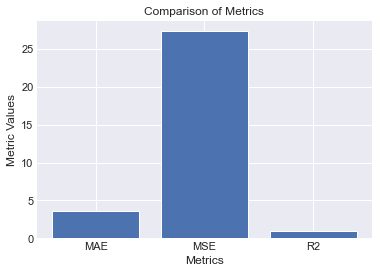

In [69]:
metrics = ['MAE', 'MSE', 'R2']
values = [mae, mse, r2]

fig, ax = plt.subplots()

ax.bar(metrics, values)
ax.set_xlabel('Metrics')
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Metrics')
 
plt.show()

### Hyperparameter tuning

We can use techniques like cross-validation and hyperparameter tuning to train the Linear Regression model and select the best model. See below how to perform these steps:

In [70]:
# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', LinearRegression())
])

In [71]:
# Define the hyperparameters and their possible values for tuning
hyperparameters = {
    'regressor__fit_intercept': [True, False],
}

In [72]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [73]:
# Get the best hyperparametrs and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [74]:
# Fit the best model to the training data
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('regressor', LinearRegression())])

In [75]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

In [76]:
# Evaluate the model's performance

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error', mae)
print('R-squared (R^2):', r2)

Mean Squared Error: 27.359327404064462
Mean Absolute Error 3.5421901383094228
R-squared (R^2): 0.9996045948616525


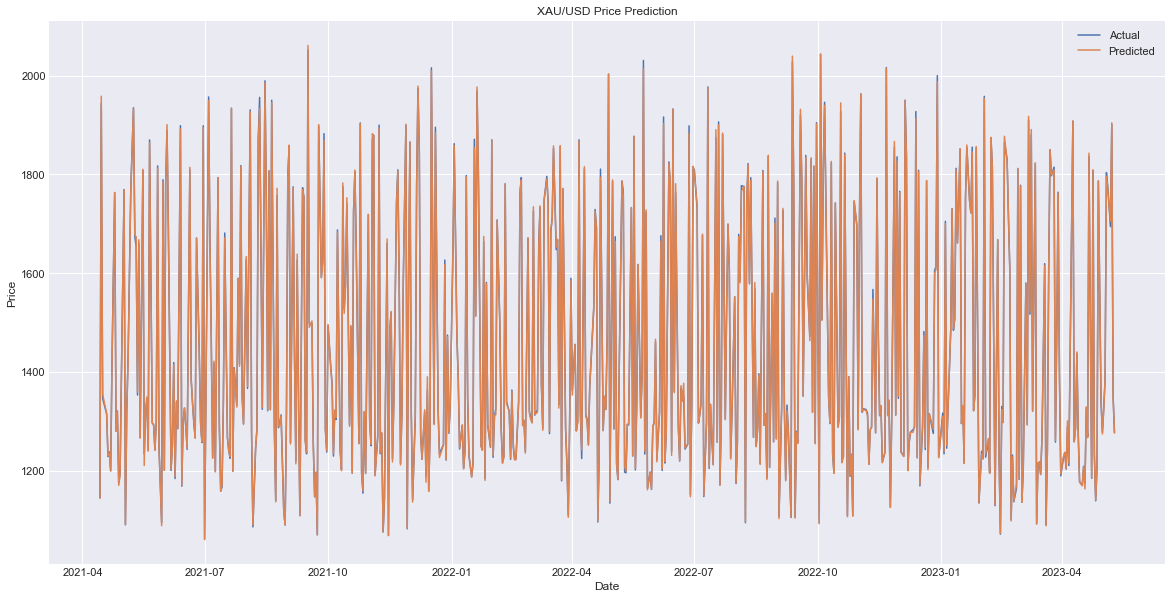

In [77]:
# Plot the actual prices and predicted prices
plt.figure(figsize=(20,10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction')
plt.legend()
plt.show()